<a href="https://colab.research.google.com/github/Yyijo/amazon_reviews_sentiment/blob/main/Project_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nltk==3.4

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import pandas as pd
import numpy as np

import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

analyser = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Load data file

In [ ]:
mydata = pd.read_csv("/content/drive/MyDrive/dss/ratings_Electronics.csv", encoding='cp1252') # File Link

len(mydata) 

2074

In [ ]:
mydata.head() # Show dataframe

,UserID,ProductID,Rating,Timestamp,brand,reviews.numHelpful,reviews.doRecommend,reviews.text,reviews.title
0,A2CX7LUOHB2NDG,321732944,5,1341100800,Amazon,4.0,False,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach
1,A2NWSAGRHCP8N5,439886341,1,1367193600,Amazon,5.0,True,I was looking for a kindle whitepaper. I saw o...,Tricked into buying
2,A2WNBOD3WNDNKT,439886341,3,1374451200,Amazon,9.0,True,I thought it would be as big as small paper bu...,Too small
3,A1GI0U4ZRJA8WN,439886341,1,1334707200,Amazon,2.0,True,Looking at the picture and seeing it was 8th g...,Don't bother
4,A1QGNMC6O1VW39,511189877,5,1397433600,Amazon,12.0,True,"amazon kindle is always the best ebook, upgrad...",best ebook


In [ ]:
mydata.shape #shape of data (column, rows)

(2074, 9)

In [ ]:
mydata.dtypes

UserID                  object
ProductID               object
Rating                   int64
Timestamp                int64
brand                   object
reviews.numHelpful     float64
reviews.doRecommend     object
reviews.text            object
reviews.title           object
dtype: object

# **Before Adding Dummy Data**  - Analyse Rating

In [ ]:
mydata.describe()['Rating'].T

count    2074.000000
mean        3.897300
std         1.467632
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [ ]:
print('Minimum rating is: %d' %(mydata.Rating.min()))
print('Maximum rating is: %d' %(mydata.Rating.max()))

Minimum rating is: 1
Maximum rating is: 5


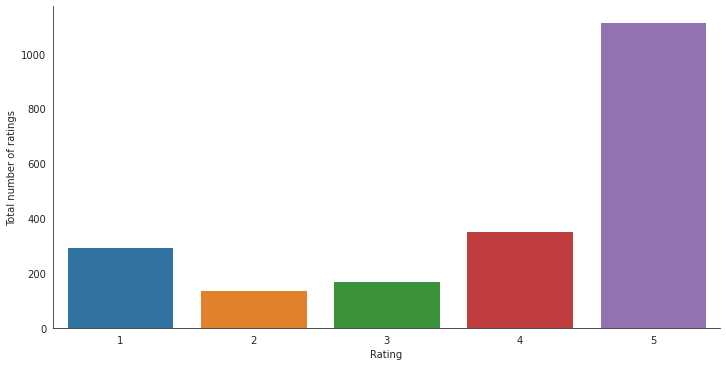

In [ ]:
#rating distribution
with sns.axes_style('white'):
    g = sns.factorplot("Rating", data=mydata, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

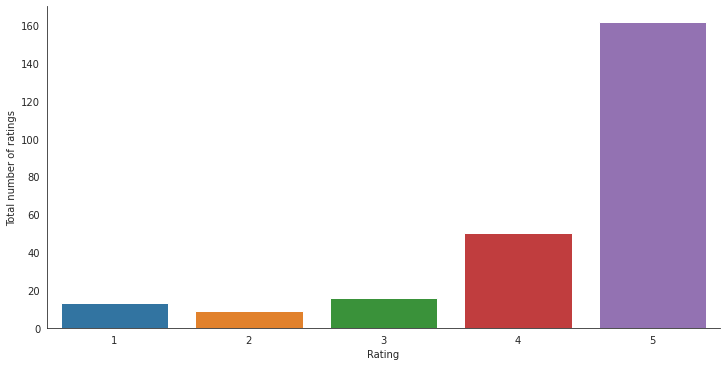

In [ ]:
#rating distribution
with sns.axes_style('white'):
    g = sns.factorplot("Rating", data=new_df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The most rating by customer is 5.

**NumHelpful**

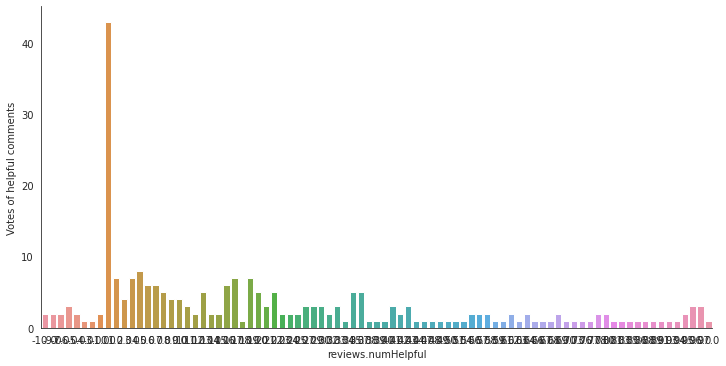

In [ ]:
#rating distribution
with sns.axes_style('white'):
    g = sns.factorplot("reviews.numHelpful", data=mydata, aspect=2.0,kind='count')
    g.set_ylabels("Votes of helpful comments")

# **AFTER dummy data is added**

**Rating & Brand**

In [ ]:
#Getting the new dataframe which contains brand who has given 10 or more ratings

new_df=mydata.groupby("brand").filter(lambda x:x['Rating'].count() >=10)

In [ ]:
len(new_df)

250

In [ ]:
new_df

,UserID,ProductID,Rating,Timestamp,brand,reviews.numHelpful,reviews.doRecommend,reviews.text,reviews.title
0,A2CX7LUOHB2NDG,321732944,5,1341100800,Amazon,4.0,False,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach
1,A2NWSAGRHCP8N5,439886341,1,1367193600,Amazon,5.0,True,I was looking for a kindle whitepaper. I saw o...,Tricked into buying
2,A2WNBOD3WNDNKT,439886341,3,1374451200,Amazon,9.0,True,I thought it would be as big as small paper bu...,Too small
3,A1GI0U4ZRJA8WN,439886341,1,1334707200,Amazon,2.0,True,Looking at the picture and seeing it was 8th g...,Don't bother
4,A1QGNMC6O1VW39,511189877,5,1397433600,Amazon,12.0,True,"amazon kindle is always the best ebook, upgrad...",best ebook
...,...,...,...,...,...,...,...,...,...
245,A1089S59XSJT2T,1400501466,5,1329955200,Amazon Fire Tv,0.0,True,Easy to use meet standards my kids really enjo...,Very educational
246,A1VMM5Z5UNEGXD,1400501466,5,1325894400,Amazon Fire Tv,0.0,True,"I already has an older version of the Kindle, ...",Love the touch screen
247,AQVOC00DZTET0,1400501466,1,1374192000,Amazon Fire Tv,0.0,True,I bought this product 4 months back. It is ver...,Worst product
248,A3LEANXMJGALUQ,1400501474,5,1403827200,Amazon Fire Tv,0.0,True,Does what we need it to. Able to download apps...,Good inexpensive tablet


In [ ]:
#total no of rating per brand
new_df.groupby('brand')['Rating'].count().sort_values(ascending=False).head()

brand
Amazon Fire Tv                  74
Amazon Digital Services Inc.    73
Amazon                          64
Amazon Echo                     39
Name: Rating, dtype: int64

Text(0.5, 1.0, '# RATINGS per Brand')

Text(0.5, 0, 'Brand')

Text(0, 0.5, 'No of ratings per brand')

[]

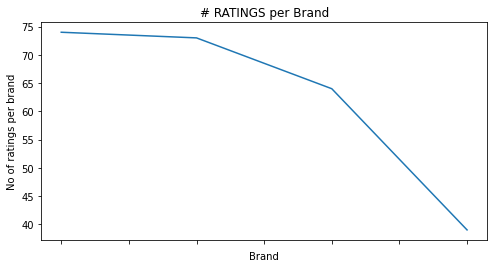

In [ ]:
no_of_ratings_per_brand = new_df.groupby(by='brand')['Rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_brand.values)
plt.title('# RATINGS per Brand')
plt.xlabel('Brand')
plt.ylabel('No of ratings per brand')
ax.set_xticklabels([])

plt.show()

In [ ]:
#avg rating per brand
new_df.groupby('brand')['Rating'].mean().head()



brand
Amazon                          4.109375
Amazon Digital Services Inc.    4.438356
Amazon Echo                     4.538462
Amazon Fire Tv                  4.391892
Name: Rating, dtype: float64

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Average Rating VS Brand')

Text(0.5, 0, 'Brand')

Text(0, 0.5, 'Avg Rating')

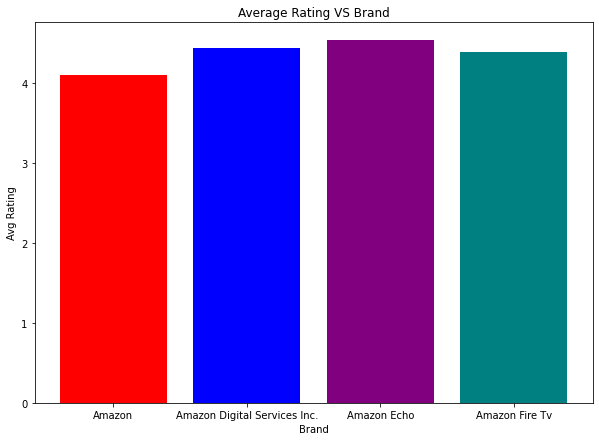

In [ ]:
import matplotlib.pyplot as plt

brand = ['Amazon', 'Amazon Digital Services Inc.', 'Amazon Echo', 'Amazon Fire Tv']   
avg = [4.109375,4.438356,4.538462,4.391892]

New_Colors = ['red','blue','purple','teal']
f, ax = plt.subplots(figsize=(10,7))
plt.bar(brand, avg, color=New_Colors)
plt.title('Average Rating VS Brand')
plt.xlabel('Brand')
plt.ylabel('Avg Rating')
plt.show()

**Rating & Recommend**

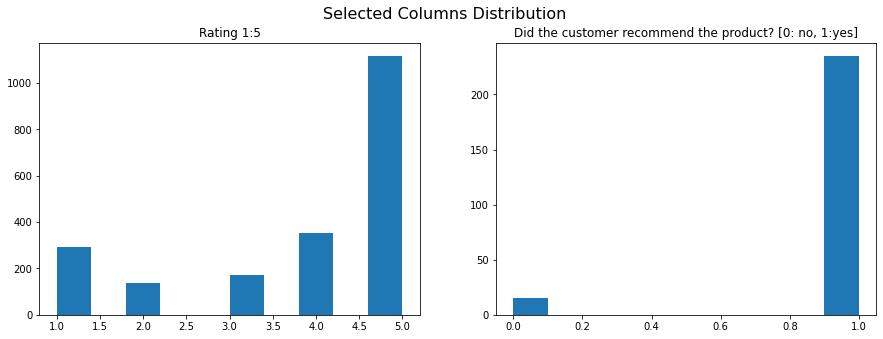

In [ ]:
fig1, (ax11, ax12) = plt.subplots(1,2, figsize = (15,5))
fig1.suptitle('Selected Columns Distribution', fontsize = 16)

ax11.hist(mydata['Rating']);
ax11.set_title('Rating 1:5');

ax12.hist(mydata['reviews.doRecommend'].astype(float));
ax12.set_title('Did the customer recommend the product? [0: no, 1:yes]');


**Explore the reviews**

**Sentiment by Rating**

Text(0.5, 0, 'Rating Count')

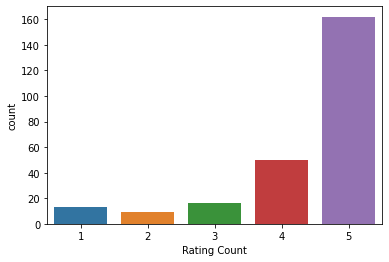

In [ ]:
#new rating distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(new_df['Rating'])
plt.xlabel('Rating Count')

In [ ]:
def to_sentiment(Rating):
    """ Convert rating into sentiment"""
    if Rating == 5 or Rating == 4:
        sentiment = 'positive'
    elif Rating == 3:
        sentiment = 'neutral'
    else:
        sentiment = 'negative'
    return sentiment

In [ ]:
new_df['sentiment'] = new_df['Rating'].apply(to_sentiment)

In [ ]:
new_df.head()

,UserID,ProductID,Rating,Timestamp,brand,reviews.numHelpful,reviews.doRecommend,reviews.text,reviews.title,sentiment
0,A2CX7LUOHB2NDG,321732944,5,1341100800,Amazon,4.0,False,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,positive
1,A2NWSAGRHCP8N5,439886341,1,1367193600,Amazon,5.0,True,I was looking for a kindle whitepaper. I saw o...,Tricked into buying,negative
2,A2WNBOD3WNDNKT,439886341,3,1374451200,Amazon,9.0,True,I thought it would be as big as small paper bu...,Too small,neutral
3,A1GI0U4ZRJA8WN,439886341,1,1334707200,Amazon,2.0,True,Looking at the picture and seeing it was 8th g...,Don't bother,negative
4,A1QGNMC6O1VW39,511189877,5,1397433600,Amazon,12.0,True,"amazon kindle is always the best ebook, upgrad...",best ebook,positive


(positive    84.8
 negative     8.8
 neutral      6.4
 Name: sentiment, dtype: float64, 2)

Text(0.5, 0, 'Class Count')

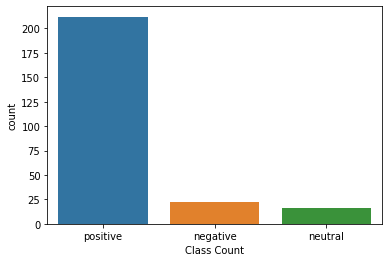

In [ ]:
(new_df.sentiment.value_counts() *100 / len(new_df), 2)
sns.countplot(new_df.sentiment)
plt.xlabel('Class Count')

# **VADER Text Sentiment Analysis**

**For "reviews.text"**

In [ ]:
def print_sentiment_scores(sentence):
  snt = analyser.polarity_scores(sentence) #call polarity analyzer
  print('{}:-<40 {}'.format(sentence, str(snt)))

In [ ]:
new_df['reviews.text'] = new_df['reviews.text'].astype(str)

#reviews.text is an object (mix data type got string, float etc). So we change all to str 

In [ ]:
%time #to calculate the time it taken for algorithm to compute a VADER score
i=0    #counter
compvall = []  #empty list to hold our computed 'compond' VADER score

while (i < len(new_df)):  
    k = analyser.polarity_scores(new_df.iloc[i]['reviews.text'])
    compvall.append(k['compound'])

    i = i+1

  #convert sentiment values to numpy for easier usage

compvall = np.array(compvall)  

len(compvall)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs


250

In [ ]:
len(new_df)

250

In [ ]:
new_df['VADER score'] = compvall #create new column "VADER score"
new_df.head() 

,UserID,ProductID,Rating,Timestamp,brand,reviews.numHelpful,reviews.doRecommend,reviews.text,reviews.title,sentiment,VADER score
0,A2CX7LUOHB2NDG,321732944,5,1341100800,Amazon,4.0,False,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,positive,0.5826
1,A2NWSAGRHCP8N5,439886341,1,1367193600,Amazon,5.0,True,I was looking for a kindle whitepaper. I saw o...,Tricked into buying,negative,-0.5239
2,A2WNBOD3WNDNKT,439886341,3,1374451200,Amazon,9.0,True,I thought it would be as big as small paper bu...,Too small,neutral,0.7329
3,A1GI0U4ZRJA8WN,439886341,1,1334707200,Amazon,2.0,True,Looking at the picture and seeing it was 8th g...,Don't bother,negative,0.9393
4,A1QGNMC6O1VW39,511189877,5,1397433600,Amazon,12.0,True,"amazon kindle is always the best ebook, upgrad...",best ebook,positive,0.7096


In [ ]:
%time
#Assigning score categories and logics

i = 0 

predicted_value = [ ] #empty series to hold our predicted values

while(i < len (new_df)):
  if ((new_df.iloc[i]['VADER score'] >= 0.05)):
    predicted_value.append('positive')
    i = i+1
  elif ((new_df.iloc[i]['VADER score'] > -0.05) & (new_df.iloc[i]['VADER score'] <0.05)):
    predicted_value.append('neutral')
    i = i+1 
  elif ((new_df.iloc[i]['VADER score'] <= -0.05)):
    predicted_value.append('negative')
    i = i+1

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.44 µs


In [ ]:
new_df['sentiment VADER'] = predicted_value
new_df.head()

,UserID,ProductID,Rating,Timestamp,brand,reviews.numHelpful,reviews.doRecommend,reviews.text,reviews.title,sentiment,VADER score,sentiment VADER
0,A2CX7LUOHB2NDG,321732944,5,1341100800,Amazon,4.0,False,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,positive,0.5826,positive
1,A2NWSAGRHCP8N5,439886341,1,1367193600,Amazon,5.0,True,I was looking for a kindle whitepaper. I saw o...,Tricked into buying,negative,-0.5239,negative
2,A2WNBOD3WNDNKT,439886341,3,1374451200,Amazon,9.0,True,I thought it would be as big as small paper bu...,Too small,neutral,0.7329,positive
3,A1GI0U4ZRJA8WN,439886341,1,1334707200,Amazon,2.0,True,Looking at the picture and seeing it was 8th g...,Don't bother,negative,0.9393,positive
4,A1QGNMC6O1VW39,511189877,5,1397433600,Amazon,12.0,True,"amazon kindle is always the best ebook, upgrad...",best ebook,positive,0.7096,positive


In [ ]:
#tengok taburan based on dataset
sentiment_spread = (new_df.groupby(by=['sentiment VADER']).size().reset_index().rename(columns={0 : "Frequency"}))
print(sentiment_spread)

  sentiment VADER  Frequency
0        negative         25
1         neutral         12
2        positive        213


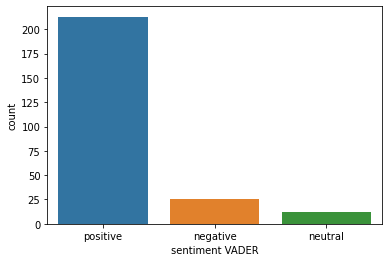

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment VADER',data=new_df, order=['positive','negative', 'neutral' ])
plt.show()

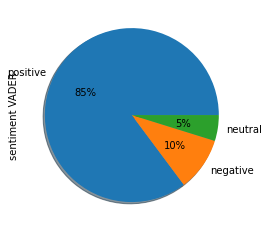

In [ ]:
new_df['sentiment VADER'].value_counts().plot(kind='pie', autopct='%1.0f%%',shadow=True)

**"reviews.text" Text Preprocessing**

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
additional = ['ebook'] #we'll store additional stopwords here
swords = set().union(stopwords.words('english'),additional) #big list of stopwords

In [ ]:
new_df.drop_duplicates(subset='reviews.text', inplace=True)

In [ ]:
new_df['processed_text']= new_df['reviews.text'].str.lower()\
          .str.replace('(@[a-z0-9]+)\w+',' ')\
          .str.replace('(http\S+)',' ')\
          .str.replace('([^0-9a-z \t])',' ')\
          .str.replace(' +',' ')\
          .apply(lambda x: [i for i in x.split() if not i in swords])

In [ ]:
new_df['processed_text'].head(10)

0        [kindle, light, easy, use, especially, beach]
1    [looking, kindle, whitepaper, saw, online, 80,...
2    [thought, would, big, small, paper, turn, like...
3    [looking, picture, seeing, 8th, generation, as...
4    [amazon, kindle, always, best, upgrade, every,...
5    [would, load, books, proper, took, dozen, trie...
6    [100, happy, purchase, caught, sale, really, g...
7    [solid, entry, level, kindle, great, kids, gif...
8    [make, excellent, reader, expect, much, device...
9    [ordered, daughter, black, paperwhite, love, r...
Name: processed_text, dtype: object

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [ ]:
new_df['stemmed'] = new_df['processed_text'].apply(lambda x: [ps.stem(i) for i in x if i != ''])
new_df['stemmed'].head()

0             [kindl, light, easi, use, especi, beach]
1    [look, kindl, whitepap, saw, onlin, 80, deal, ...
2    [thought, would, big, small, paper, turn, like...
3    [look, pictur, see, 8th, gener, assum, would, ...
4    [amazon, kindl, alway, best, upgrad, everi, ne...
Name: stemmed, dtype: object

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
bigstring = new_df['processed_text'].apply(lambda x: ' '.join(x)).str.cat(sep='')

<Figure size 864x864 with 0 Axes>

(0.0, 1.0, 0.0, 1.0)

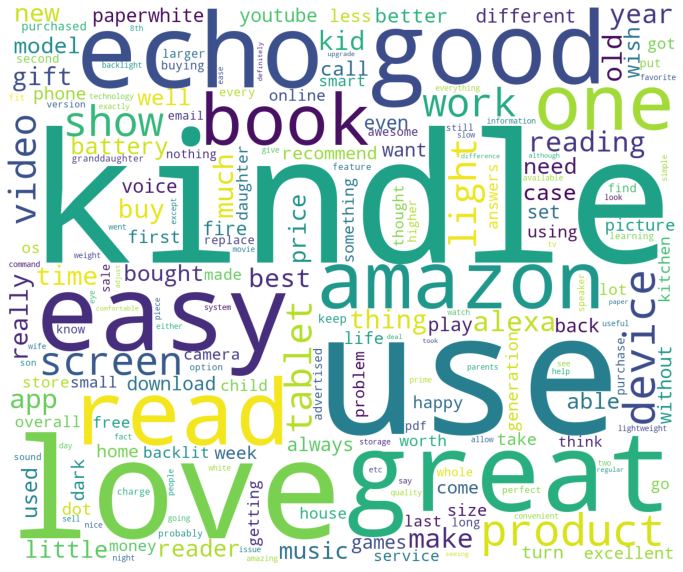

In [ ]:
plt.figure(figsize=(12,12))
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      collocations=False,
                      width=1200,
                      height=1000
                      ).generate(bigstring)
plt.axis('off')
plt.imshow(wordcloud)

In [ ]:
import re
words = new_df['processed_text'].dropna()\
                                .apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                                .sum(axis=0)\
                                .to_frame()\
                                .reset_index()\
                                .sort_values(by=0,ascending=False)
words.columns = ['word','occurences']

In [ ]:
words.head()

,word,occurences
11,kindle,35.0
145,echo,23.0
111,amazon,23.0
0,use,21.0
126,easy,21.0


Text(0.5, 0.98, 'Top 10 Words for Amazon product review text')

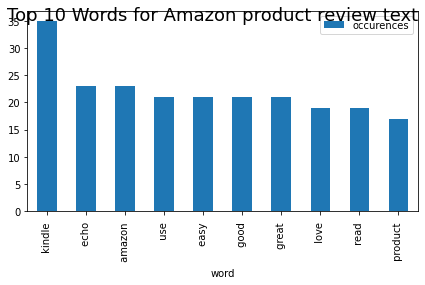

In [ ]:
words[:10].plot(kind='bar',y='occurences',x='word')
plt.grid(False)
plt.tight_layout()
plt.suptitle('Top 10 Words for Amazon product review text', fontsize=18)

In [ ]:
from nltk import bigrams
bigramseries = pd.Series([word for sublist in new_df['processed_text'].dropna()\
                          .apply(lambda x: [i for i in bigrams(x)])\
                          .tolist() for word in sublist])\
                          .value_counts()

In [ ]:
bigramseries.head()

(easy, use)         20
(echo, show)        14
(year, old)         11
(great, product)     9
(love, echo)         7
dtype: int64

Text(0.5, 0.98, 'Top 10 Bigrams for keyword: Amazon product review text')

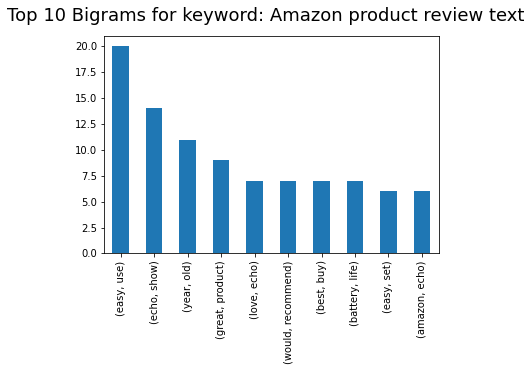

In [ ]:
plt.suptitle('Top 10 Bigrams for keyword: Amazon product review text', fontsize=18)
bigramseries[:10].plot(kind='bar')

*Classification for reviews.text*

In [ ]:
import numpy as np #linear algebra 
import pandas as pd #data processing 
import matplotlib.pyplot as plt #data visualisation 

import re
import nltk 
from nltk.corpus import stopwords 
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print( "All libraries are imported" )

All libraries are imported


In [ ]:
train,test = train_test_split(new_df,test_size=0.2,random_state=42)

In [ ]:
train_clean_review=[]
for review in train['reviews.text']:
    train_clean_review.append(review)
test_clean_review=[]
for review in test['reviews.text']:
    test_clean_review.append(review)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features = v.fit_transform(train_clean_review)
test_features = v.transform(test_clean_review)

In [ ]:
Classifiers = [
      SVC(kernel="rbf", C=0.025,probability=True),
      DecisionTreeClassifier(), 
      RandomForestClassifier(n_estimators=200)]

Accuracy of SVC is0.9
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         0
    positive       1.00      0.90      0.95        50

    accuracy                           0.90        50
   macro avg       0.50      0.45      0.47        50
weighted avg       1.00      0.90      0.95        50



<Figure size 432x288 with 0 Axes>

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe974d9bd90>)

([<matplotlib.axis.XTick at 0x7fe974da62d0>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7fe974dab2d0>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

<Figure size 432x288 with 0 Axes>

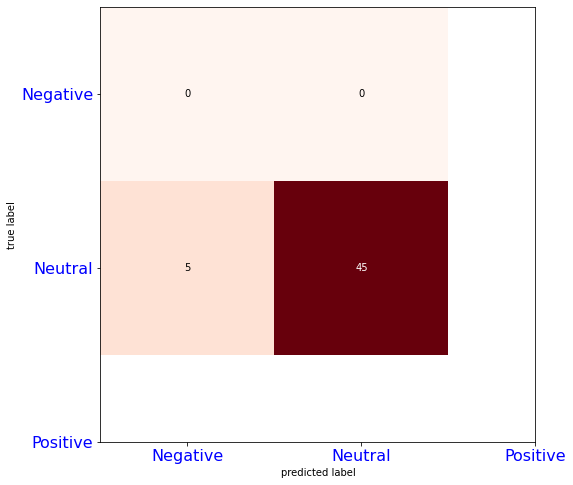

Accuracy of DecisionTreeClassifier is0.78
              precision    recall  f1-score   support

    negative       0.20      0.20      0.20         5
     neutral       0.00      0.00      0.00         4
    positive       0.84      0.93      0.88        41

    accuracy                           0.78        50
   macro avg       0.35      0.38      0.36        50
weighted avg       0.71      0.78      0.74        50



<Figure size 432x288 with 0 Axes>

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe974d587d0>)

([<matplotlib.axis.XTick at 0x7fe974d72f50>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7fe974d74f90>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

<Figure size 432x288 with 0 Axes>

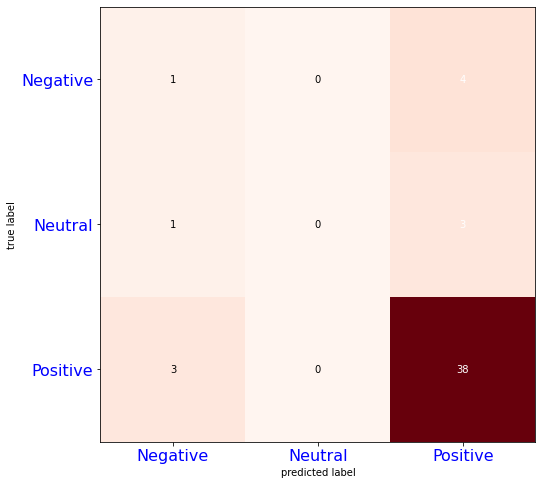

Accuracy of RandomForestClassifier is0.9
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         0
    positive       1.00      0.90      0.95        50

    accuracy                           0.90        50
   macro avg       0.50      0.45      0.47        50
weighted avg       1.00      0.90      0.95        50



<Figure size 432x288 with 0 Axes>

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe975c1e390>)

([<matplotlib.axis.XTick at 0x7fe974cdf4d0>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7fe974d2ad90>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

<Figure size 432x288 with 0 Axes>

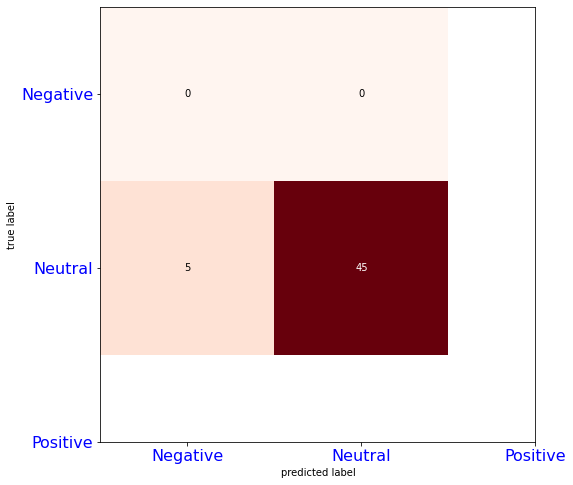

In [ ]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
  try:
    fit = classifier.fit(train_features,train['sentiment VADER'])
    pred = fit.predict(test_features)
  except Exception:
    fit = classifier.fit(dense_features,train['sentiment VADER'])
    pred = fit.predict(dense_test)
    
  accuracy = accuracy_score(pred,test['sentiment VADER'])
  Accuracy.append(accuracy)
  Model.append(classifier.__class__.__name__)
  print('Accuracy of '+classifier.__class__.__name__+ ' is'+str(accuracy))
  print(classification_report(pred,test['sentiment VADER']))
  cm=confusion_matrix(pred, test['sentiment VADER'])
  plt.figure()

  plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)
  plt.xticks(range(3),['Negative','Neutral','Positive'], fontsize=16,color='blue')
  plt.yticks(range(3),['Negative','Neutral','Positive'], fontsize=16,color='blue')
  plt.show()

**For "reviews.title"**

In [ ]:
len(new_df)

247

In [ ]:
new_df['reviews.title'] = new_df['reviews.title'].astype(str)

In [ ]:
%time #to calculate the time it taken for algorithm to compute a VADER score
i=0    #counter
compvall_ = []  #empty list to hold our computed 'compond' VADER score

while (i < len(new_df)):  
    k = analyser.polarity_scores(new_df.iloc[i]['reviews.title'])
    compvall_.append(k['compound'])

    i = i+1

  #convert sentiment values to numpy for easier usage

compvall_ = np.array(compvall_)  

len(compvall_)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.3 µs


247

In [ ]:
new_df['VADER SCORE'] = compvall_ #create new column "VADER SCORE"
new_df.head() 

,UserID,ProductID,Rating,Timestamp,brand,reviews.numHelpful,reviews.doRecommend,reviews.text,reviews.title,sentiment,VADER score,sentiment VADER,processed_text,stemmed,VADER SCORE
0,A2CX7LUOHB2NDG,321732944,5,1341100800,Amazon,4.0,False,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,positive,0.5826,positive,"[kindle, light, easy, use, especially, beach]","[kindl, light, easi, use, especi, beach]",0.7906
1,A2NWSAGRHCP8N5,439886341,1,1367193600,Amazon,5.0,True,I was looking for a kindle whitepaper. I saw o...,Tricked into buying,negative,-0.5239,negative,"[looking, kindle, whitepaper, saw, online, 80,...","[look, kindl, whitepap, saw, onlin, 80, deal, ...",-0.1531
2,A2WNBOD3WNDNKT,439886341,3,1374451200,Amazon,9.0,True,I thought it would be as big as small paper bu...,Too small,neutral,0.7329,positive,"[thought, would, big, small, paper, turn, like...","[thought, would, big, small, paper, turn, like...",0.0000
3,A1GI0U4ZRJA8WN,439886341,1,1334707200,Amazon,2.0,True,Looking at the picture and seeing it was 8th g...,Don't bother,negative,0.9393,positive,"[looking, picture, seeing, 8th, generation, as...","[look, pictur, see, 8th, gener, assum, would, ...",0.2584
4,A1QGNMC6O1VW39,511189877,5,1397433600,Amazon,12.0,True,"amazon kindle is always the best ebook, upgrad...",best ebook,positive,0.7096,positive,"[amazon, kindle, always, best, upgrade, every,...","[amazon, kindl, alway, best, upgrad, everi, ne...",0.6369


In [ ]:
%time
#Assigning score categories and logics

i = 0 

predicted_values = [ ] #empty series to hold our predicted values

while(i < len (new_df)):
  if ((new_df.iloc[i]['VADER SCORE'] >= 0.05)):
    predicted_values.append('positive')
    i = i+1
  elif ((new_df.iloc[i]['VADER SCORE'] > -0.05) & (new_df.iloc[i]['VADER SCORE'] <0.05)):
    predicted_values.append('neutral')
    i = i+1 
  elif ((new_df.iloc[i]['VADER SCORE'] <= -0.05)):
    predicted_values.append('negative')
    i = i+1

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs


In [ ]:
new_df['SENTIMENT VADER'] = predicted_values
new_df.head()

,UserID,ProductID,Rating,Timestamp,brand,reviews.numHelpful,reviews.doRecommend,reviews.text,reviews.title,sentiment,VADER score,sentiment VADER,processed_text,stemmed,VADER SCORE,SENTIMENT VADER
0,A2CX7LUOHB2NDG,321732944,5,1341100800,Amazon,4.0,False,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,positive,0.5826,positive,"[kindle, light, easy, use, especially, beach]","[kindl, light, easi, use, especi, beach]",0.7906,positive
1,A2NWSAGRHCP8N5,439886341,1,1367193600,Amazon,5.0,True,I was looking for a kindle whitepaper. I saw o...,Tricked into buying,negative,-0.5239,negative,"[looking, kindle, whitepaper, saw, online, 80,...","[look, kindl, whitepap, saw, onlin, 80, deal, ...",-0.1531,negative
2,A2WNBOD3WNDNKT,439886341,3,1374451200,Amazon,9.0,True,I thought it would be as big as small paper bu...,Too small,neutral,0.7329,positive,"[thought, would, big, small, paper, turn, like...","[thought, would, big, small, paper, turn, like...",0.0000,neutral
3,A1GI0U4ZRJA8WN,439886341,1,1334707200,Amazon,2.0,True,Looking at the picture and seeing it was 8th g...,Don't bother,negative,0.9393,positive,"[looking, picture, seeing, 8th, generation, as...","[look, pictur, see, 8th, gener, assum, would, ...",0.2584,positive
4,A1QGNMC6O1VW39,511189877,5,1397433600,Amazon,12.0,True,"amazon kindle is always the best ebook, upgrad...",best ebook,positive,0.7096,positive,"[amazon, kindle, always, best, upgrade, every,...","[amazon, kindl, alway, best, upgrad, everi, ne...",0.6369,positive


In [ ]:
sentiment_spread = (new_df.groupby(by=['SENTIMENT VADER']).size().reset_index().rename(columns={0 : "Frequency"}))
print(sentiment_spread)

  SENTIMENT VADER  Frequency
0        negative         14
1         neutral         42
2        positive        191


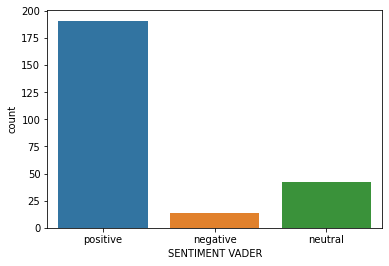

In [ ]:
sns.countplot(x='SENTIMENT VADER',data=new_df, order=['positive','negative', 'neutral' ])
plt.show()

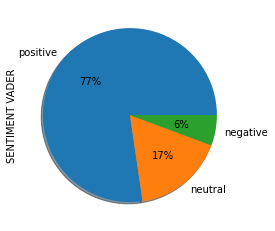

In [ ]:
new_df['SENTIMENT VADER'].value_counts().plot(kind='pie', autopct='%1.0f%%',shadow=True)

**"reviews.title" Text Preprocessing**

In [ ]:
additional = ['nah','e'] #we'll store additional stopwords here
swords = set().union(stopwords.words('english'),additional) #big list of stopwords

In [ ]:
new_df['processed_title']= new_df['reviews.title'].str.lower()\
          .str.replace('(@[a-z0-9]+)\w+',' ')\
          .str.replace('(http\S+)',' ')\
          .str.replace('([^0-9a-z \t])',' ')\
          .str.replace(' +',' ')\
          .apply(lambda x: [i for i in x.split() if not i in swords])

In [ ]:
new_df['processed_title'].head()

0    [great, light, reader, easy, use, beach]
1                           [tricked, buying]
2                                     [small]
3                                    [bother]
4                               [best, ebook]
Name: processed_title, dtype: object

In [ ]:
new_df['Stemmed'] = new_df['processed_title'].apply(lambda x: [ps.stem(i) for i in x if i != ''])
new_df['Stemmed'].head()

0    [great, light, reader, easi, use, beach]
1                                [trick, buy]
2                                     [small]
3                                    [bother]
4                               [best, ebook]
Name: Stemmed, dtype: object

In [ ]:
bigstring = new_df['processed_title'].apply(lambda x: ' '.join(x)).str.cat(sep='')

<Figure size 864x864 with 0 Axes>

(0.0, 1.0, 0.0, 1.0)

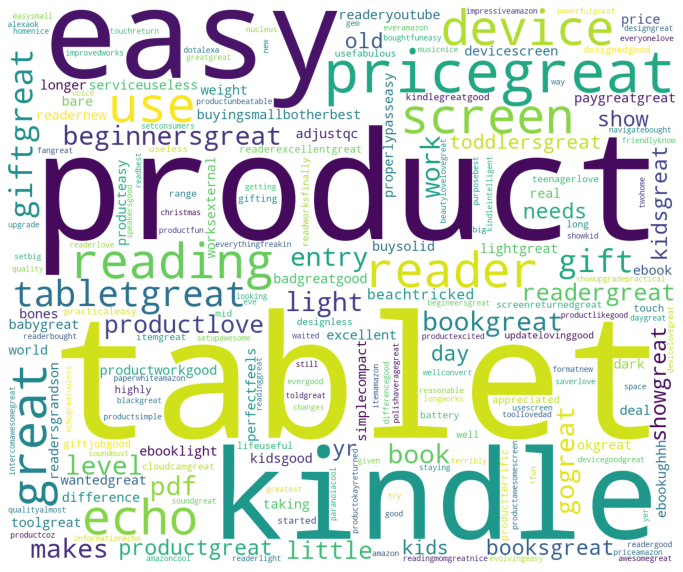

In [ ]:
plt.figure(figsize=(12,12))
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      collocations=False,
                      width=1200,
                      height=1000
                      ).generate(bigstring)
plt.axis('off')
plt.imshow(wordcloud)

In [ ]:
Words = new_df['processed_title'].dropna()\
                                .apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                                .sum(axis=0)\
                                .to_frame()\
                                .reset_index()\
                                .sort_values(by=0,ascending=False)
Words.columns = ['word','occurences']

In [ ]:
Words.head()

,word,occurences
66,tablet,12.0
53,product,9.0
58,screen,4.0
18,device,4.0
37,kindle,4.0


Text(0.5, 0.98, 'Top 10 Words for Amazon product review title')

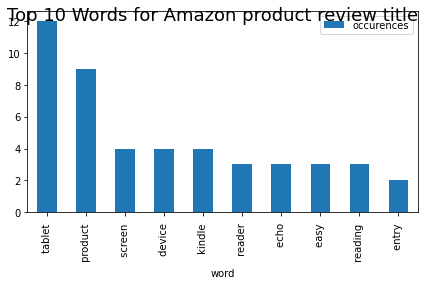

In [ ]:
Words[:10].plot(kind='bar',y='occurences',x='word')
plt.grid(False)
plt.tight_layout()
plt.suptitle('Top 10 Words for Amazon product review title', fontsize=18)

In [ ]:
Bigramseries = pd.Series([word for sublist in new_df['processed_title'].dropna()\
                          .apply(lambda x: [i for i in bigrams(x)])\
                          .tolist() for word in sublist])\
                          .value_counts()

In [ ]:
Bigramseries.head()

(great, product)    18
(great, tablet)      9
(easy, use)          6
(echo, show)         5
(great, reader)      5
dtype: int64

Text(0.5, 0.98, 'Top 10 Bigrams for keyword: Amazon product review title')

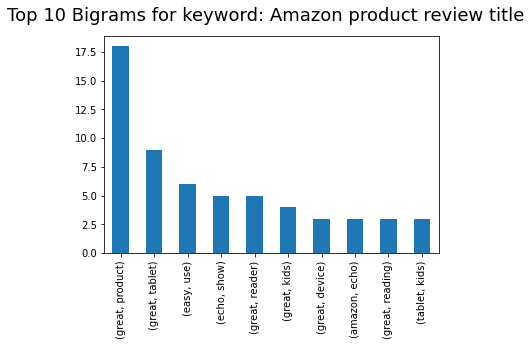

In [ ]:
plt.suptitle('Top 10 Bigrams for keyword: Amazon product review title', fontsize=18)
Bigramseries[:10].plot(kind='bar')

*Classification for reviews.title*

In [ ]:
train,test = train_test_split(new_df,test_size=0.2,random_state=42)

In [ ]:
train_clean_title=[]
for title in train['reviews.title']:
    train_clean_title.append(title)
test_clean_title=[]
for title in test['reviews.title']:
    test_clean_title.append(title)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features = v.fit_transform(train_clean_title)
test_features = v.transform(test_clean_title)

In [ ]:
Classifiers = [
      SVC(kernel="rbf", C=0.025,probability=True),
      DecisionTreeClassifier(), 
      RandomForestClassifier(n_estimators=200)]

Accuracy of SVC is0.78
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         0
     neutral       0.00      0.00      0.00         0
    positive       1.00      0.78      0.88        50

    accuracy                           0.78        50
   macro avg       0.33      0.26      0.29        50
weighted avg       1.00      0.78      0.88        50



<Figure size 432x288 with 0 Axes>

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe974d49fd0>)

([<matplotlib.axis.XTick at 0x7fe974d33490>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7fe974c06ad0>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

<Figure size 432x288 with 0 Axes>

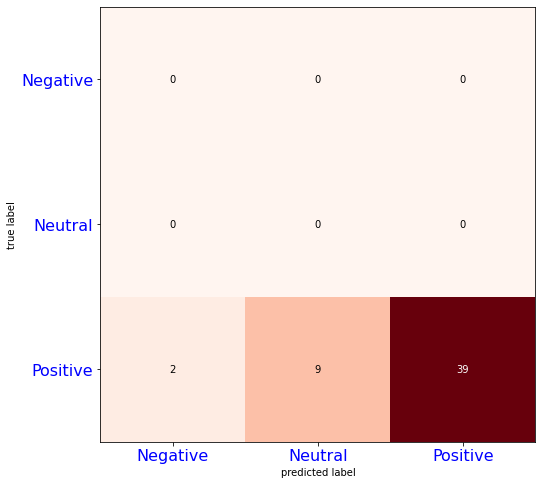

Accuracy of DecisionTreeClassifier is0.8
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       0.33      0.60      0.43         5
    positive       0.95      0.84      0.89        44

    accuracy                           0.80        50
   macro avg       0.43      0.48      0.44        50
weighted avg       0.87      0.80      0.83        50



<Figure size 432x288 with 0 Axes>

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe974a96490>)

([<matplotlib.axis.XTick at 0x7fe974ab7790>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7fe974abb7d0>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

<Figure size 432x288 with 0 Axes>

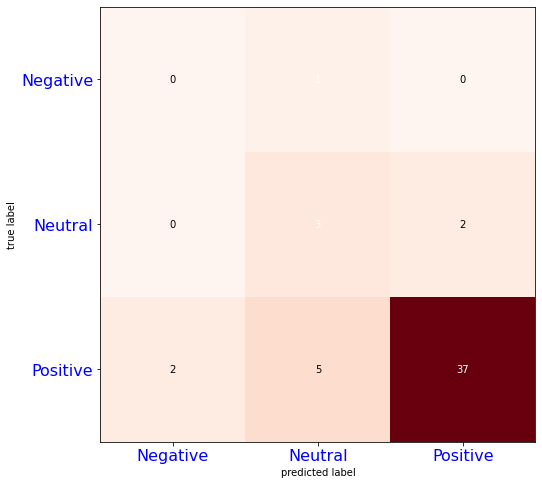

Accuracy of RandomForestClassifier is0.82
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         0
     neutral       0.33      0.75      0.46         4
    positive       0.97      0.83      0.89        46

    accuracy                           0.82        50
   macro avg       0.44      0.53      0.45        50
weighted avg       0.92      0.82      0.86        50



<Figure size 432x288 with 0 Axes>

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe974a36790>)

([<matplotlib.axis.XTick at 0x7fe974a2dd10>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7fe974a1b890>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

<Figure size 432x288 with 0 Axes>

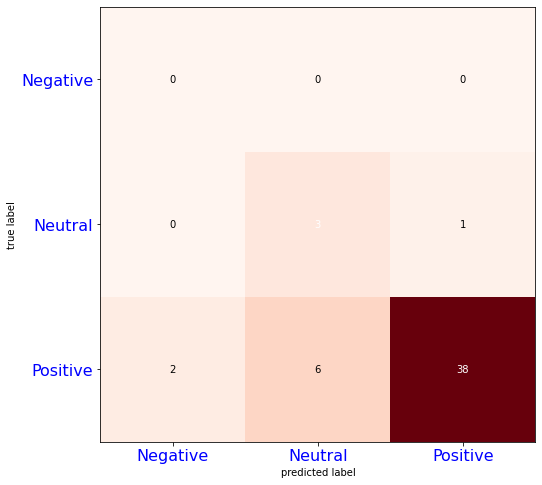

In [ ]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
  try:
    fit = classifier.fit(train_features,train['SENTIMENT VADER'])
    pred = fit.predict(test_features)
  except Exception:
    fit = classifier.fit(dense_features,train['SENTIMENT VADER'])
    pred = fit.predict(dense_test)
    
  accuracy = accuracy_score(pred,test['SENTIMENT VADER'])
  Accuracy.append(accuracy)
  Model.append(classifier.__class__.__name__)
  print('Accuracy of '+classifier.__class__.__name__+ ' is'+str(accuracy))
  print(classification_report(pred,test['SENTIMENT VADER']))
  cm=confusion_matrix(pred, test['SENTIMENT VADER'])
  plt.figure()

  plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)
  plt.xticks(range(3),['Negative','Neutral','Positive'], fontsize=16,color='blue')
  plt.yticks(range(3),['Negative','Neutral','Positive'], fontsize=16,color='blue')
  plt.show()

**Calculating average sentiment score for reviews.text & reviews.title**

In [ ]:
new_df['average'] = new_df[['VADER score', 'VADER SCORE']].mean(axis=1)
new_df.head()

,UserID,ProductID,Rating,Timestamp,brand,reviews.numHelpful,reviews.doRecommend,reviews.text,reviews.title,sentiment,VADER score,sentiment VADER,processed_text,stemmed,VADER SCORE,SENTIMENT VADER,processed_title,Stemmed,average
0,A2CX7LUOHB2NDG,321732944,5,1341100800,Amazon,4.0,False,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,positive,0.5826,positive,"[kindle, light, easy, use, especially, beach]","[kindl, light, easi, use, especi, beach]",0.7906,positive,"[great, light, reader, easy, use, beach]","[great, light, reader, easi, use, beach]",0.68660
1,A2NWSAGRHCP8N5,439886341,1,1367193600,Amazon,5.0,True,I was looking for a kindle whitepaper. I saw o...,Tricked into buying,negative,-0.5239,negative,"[looking, kindle, whitepaper, saw, online, 80,...","[look, kindl, whitepap, saw, onlin, 80, deal, ...",-0.1531,negative,"[tricked, buying]","[trick, buy]",-0.33850
2,A2WNBOD3WNDNKT,439886341,3,1374451200,Amazon,9.0,True,I thought it would be as big as small paper bu...,Too small,neutral,0.7329,positive,"[thought, would, big, small, paper, turn, like...","[thought, would, big, small, paper, turn, like...",0.0000,neutral,[small],[small],0.36645
3,A1GI0U4ZRJA8WN,439886341,1,1334707200,Amazon,2.0,True,Looking at the picture and seeing it was 8th g...,Don't bother,negative,0.9393,positive,"[looking, picture, seeing, 8th, generation, as...","[look, pictur, see, 8th, gener, assum, would, ...",0.2584,positive,[bother],[bother],0.59885
4,A1QGNMC6O1VW39,511189877,5,1397433600,Amazon,12.0,True,"amazon kindle is always the best ebook, upgrad...",best ebook,positive,0.7096,positive,"[amazon, kindle, always, best, upgrade, every,...","[amazon, kindl, alway, best, upgrad, everi, ne...",0.6369,positive,"[best, ebook]","[best, ebook]",0.67325


In [ ]:
i = 0 

Predicted_value = [ ] #empty series to hold our predicted values

while(i < len (new_df)):
  if ((new_df.iloc[i]['average'] >= 0.05)):
    Predicted_value.append('positive')
    i = i+1
  elif ((new_df.iloc[i]['average'] > -0.05) & (new_df.iloc[i]['average'] <0.05)):
    Predicted_value.append('neutral')
    i = i+1 
  elif ((new_df.iloc[i]['average'] <= -0.05)):
    Predicted_value.append('negative')
    i = i+1

In [ ]:
new_df['SENTIMENT VADER REVIEW'] = Predicted_value
new_df.head()

,UserID,ProductID,Rating,Timestamp,brand,reviews.numHelpful,reviews.doRecommend,reviews.text,reviews.title,sentiment,VADER score,sentiment VADER,processed_text,stemmed,VADER SCORE,SENTIMENT VADER,processed_title,Stemmed,average,SENTIMENT VADER REVIEW
0,A2CX7LUOHB2NDG,321732944,5,1341100800,Amazon,4.0,False,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,positive,0.5826,positive,"[kindle, light, easy, use, especially, beach]","[kindl, light, easi, use, especi, beach]",0.7906,positive,"[great, light, reader, easy, use, beach]","[great, light, reader, easi, use, beach]",0.68660,positive
1,A2NWSAGRHCP8N5,439886341,1,1367193600,Amazon,5.0,True,I was looking for a kindle whitepaper. I saw o...,Tricked into buying,negative,-0.5239,negative,"[looking, kindle, whitepaper, saw, online, 80,...","[look, kindl, whitepap, saw, onlin, 80, deal, ...",-0.1531,negative,"[tricked, buying]","[trick, buy]",-0.33850,negative
2,A2WNBOD3WNDNKT,439886341,3,1374451200,Amazon,9.0,True,I thought it would be as big as small paper bu...,Too small,neutral,0.7329,positive,"[thought, would, big, small, paper, turn, like...","[thought, would, big, small, paper, turn, like...",0.0000,neutral,[small],[small],0.36645,positive
3,A1GI0U4ZRJA8WN,439886341,1,1334707200,Amazon,2.0,True,Looking at the picture and seeing it was 8th g...,Don't bother,negative,0.9393,positive,"[looking, picture, seeing, 8th, generation, as...","[look, pictur, see, 8th, gener, assum, would, ...",0.2584,positive,[bother],[bother],0.59885,positive
4,A1QGNMC6O1VW39,511189877,5,1397433600,Amazon,12.0,True,"amazon kindle is always the best ebook, upgrad...",best ebook,positive,0.7096,positive,"[amazon, kindle, always, best, upgrade, every,...","[amazon, kindl, alway, best, upgrad, everi, ne...",0.6369,positive,"[best, ebook]","[best, ebook]",0.67325,positive


In [ ]:
df_average = new_df[['VADER score','VADER SCORE' ,'average','SENTIMENT VADER REVIEW']]

df_average

,VADER score,VADER SCORE,average,SENTIMENT VADER REVIEW
0,0.5826,0.7906,0.68660,positive
1,-0.5239,-0.1531,-0.33850,negative
2,0.7329,0.0000,0.36645,positive
3,0.9393,0.2584,0.59885,positive
4,0.7096,0.6369,0.67325,positive
...,...,...,...,...
244,0.6187,0.0000,0.30935,positive
245,0.7574,0.0000,0.37870,positive
247,0.7506,-0.6249,0.06285,positive
248,0.5106,0.4404,0.47550,positive


In [ ]:
sentiment_spread = (new_df.groupby(by=['SENTIMENT VADER REVIEW']).size().reset_index().rename(columns={0 : "Frequency"}))
print(sentiment_spread)

  SENTIMENT VADER REVIEW  Frequency
0               negative         21
1                neutral          8
2               positive        218


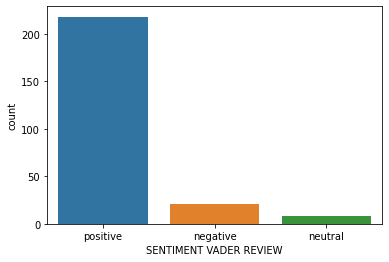

In [ ]:
sns.countplot(x='SENTIMENT VADER REVIEW',data=new_df, order=['positive','negative', 'neutral' ])
plt.show()

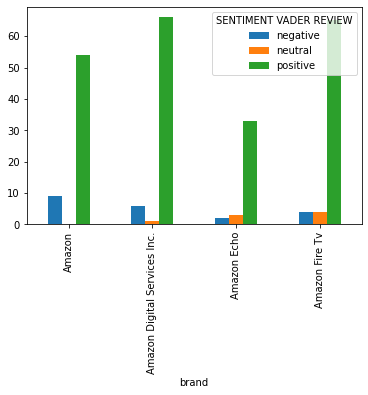

In [ ]:
# to determine which brand has the most positive comments based on both reviews.text & reviews.title
review_sentiment = new_df.groupby(['brand', 'SENTIMENT VADER REVIEW']).sentiment.count().unstack()
review_sentiment.plot(kind='bar')

# **Rating, Recommendation and Positive Comment on Brand**

In [ ]:
import string
import collections
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re

from wordcloud import WordCloud
from textwrap import wrap
from textblob import TextBlob

#nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

In [ ]:
new_df.head() #show listing

,UserID,ProductID,Rating,Timestamp,brand,reviews.numHelpful,reviews.doRecommend,reviews.text,reviews.title,sentiment,VADER score,sentiment VADER,processed_text,stemmed,VADER SCORE,SENTIMENT VADER,processed_title,Stemmed,average,SENTIMENT VADER REVIEW
0,A2CX7LUOHB2NDG,321732944,5,1341100800,Amazon,4.0,False,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,positive,0.5826,positive,"[kindle, light, easy, use, especially, beach]","[kindl, light, easi, use, especi, beach]",0.7906,positive,"[great, light, reader, easy, use, beach]","[great, light, reader, easi, use, beach]",0.68660,positive
1,A2NWSAGRHCP8N5,439886341,1,1367193600,Amazon,5.0,True,I was looking for a kindle whitepaper. I saw o...,Tricked into buying,negative,-0.5239,negative,"[looking, kindle, whitepaper, saw, online, 80,...","[look, kindl, whitepap, saw, onlin, 80, deal, ...",-0.1531,negative,"[tricked, buying]","[trick, buy]",-0.33850,negative
2,A2WNBOD3WNDNKT,439886341,3,1374451200,Amazon,9.0,True,I thought it would be as big as small paper bu...,Too small,neutral,0.7329,positive,"[thought, would, big, small, paper, turn, like...","[thought, would, big, small, paper, turn, like...",0.0000,neutral,[small],[small],0.36645,positive
3,A1GI0U4ZRJA8WN,439886341,1,1334707200,Amazon,2.0,True,Looking at the picture and seeing it was 8th g...,Don't bother,negative,0.9393,positive,"[looking, picture, seeing, 8th, generation, as...","[look, pictur, see, 8th, gener, assum, would, ...",0.2584,positive,[bother],[bother],0.59885,positive
4,A1QGNMC6O1VW39,511189877,5,1397433600,Amazon,12.0,True,"amazon kindle is always the best ebook, upgrad...",best ebook,positive,0.7096,positive,"[amazon, kindle, always, best, upgrade, every,...","[amazon, kindl, alway, best, upgrad, everi, ne...",0.6369,positive,"[best, ebook]","[best, ebook]",0.67325,positive


**Rating on each Brand**

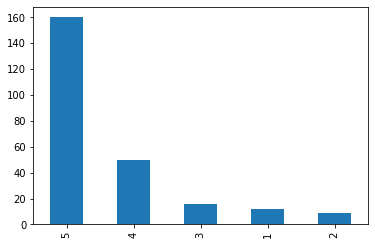

In [ ]:
 #all rating list
new_df['Rating'].value_counts().plot(kind='bar')

**Review's Recommendation group by Brand**

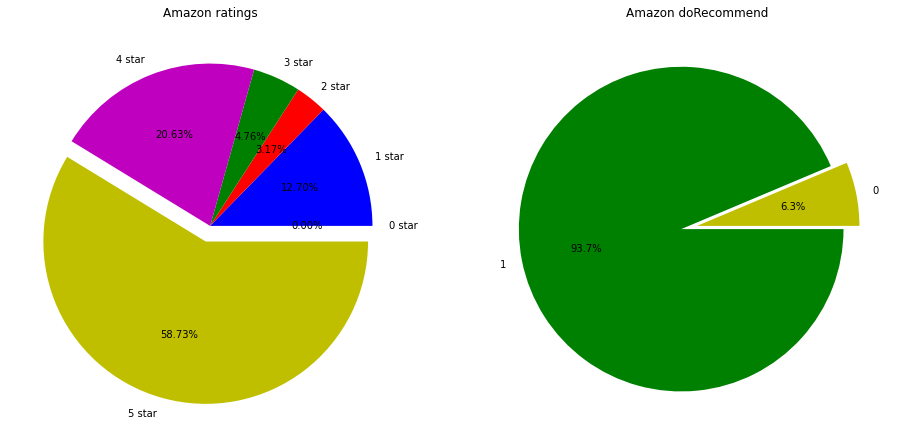

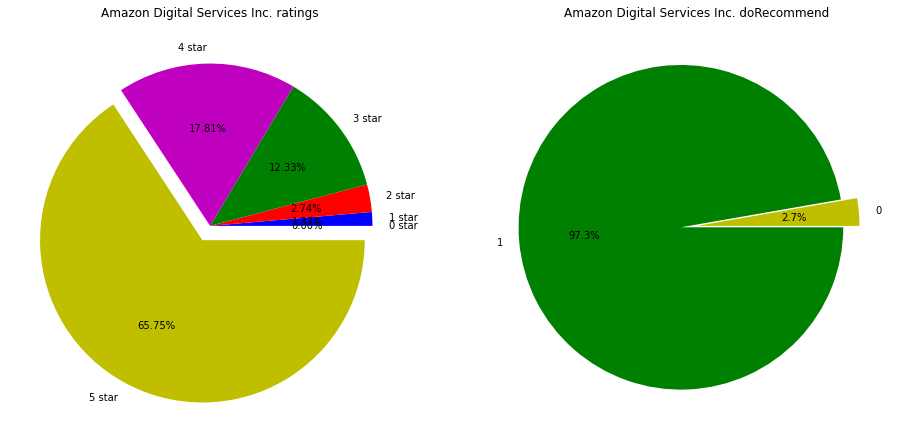

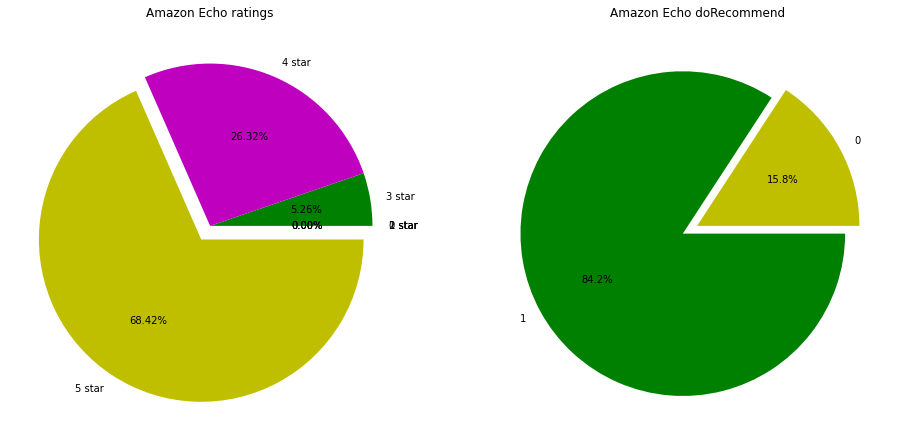

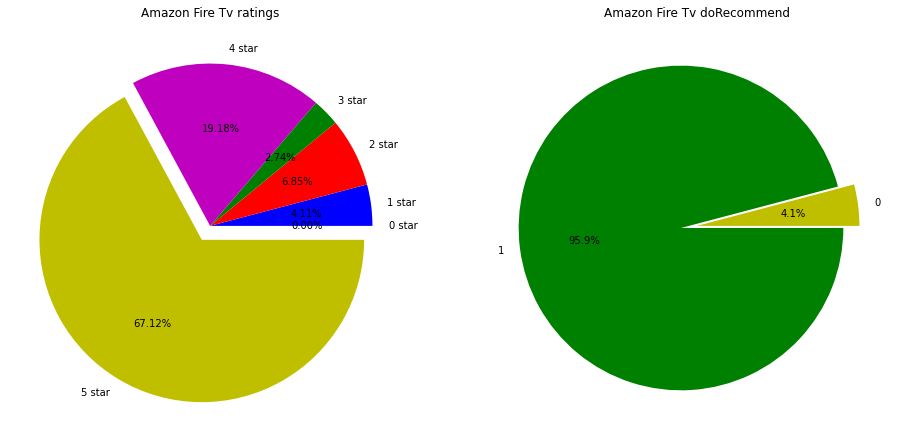

In [ ]:
def draw_pie(new_df,title=None):

    fig = plt.figure(1, figsize=(16, 14))

    count=[]
    labels=[]
    for i in range(max(new_df['Rating'])+1):
        labels.append(f'{i} star')
        count.append((new_df['Rating'] == i).sum())

    colors = ['b','b','r','g','m','y']
    explode = [0,0,0,0,0,0.1]
    plt.subplot(1,2,1)
    plt.pie(count, labels=labels, colors=colors, explode=explode,
            autopct='%1.2f%%')
    plt.title(title)
    
    count=[]
    labels=[]
    for i in range(2):
        labels.append(i)
        count.append((data['reviews.doRecommend'] == i).sum())

    colors=['y','g']
    plt.subplot(1,2,2)
    plt.pie(count, labels=labels, colors=colors, explode=[0,0.1],
            autopct='%1.1f%%')
    plt.title(f'{item} doRecommend')

    plt.show()


for item,data in new_df.groupby('brand'):
    draw_pie(data, title=f'{item} ratings')

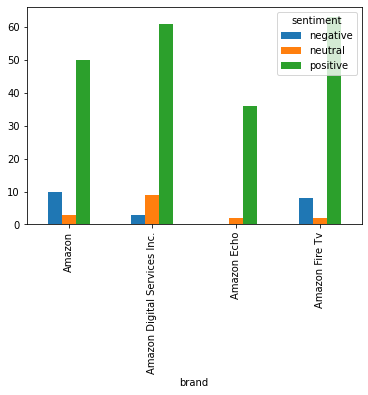

In [ ]:
#to determine which brand has the highest rating
review_sentiment = new_df.groupby(['brand', 'sentiment']).sentiment.count().unstack()
review_sentiment.plot(kind='bar')

**Positive Comments on Brand**

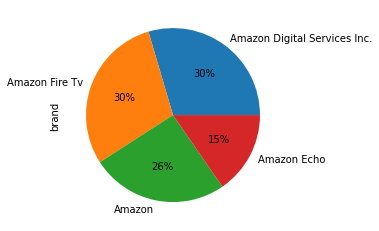

In [ ]:
# review distribution group by brand
new_df.brand.value_counts().plot(kind='pie', autopct='%1.0f%%')

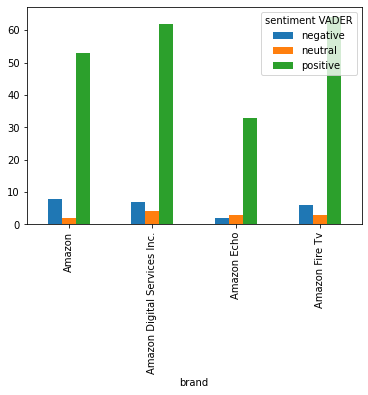

In [ ]:
# to determine which brand has the most positive comments
review_sentiment = new_df.groupby(['brand', 'sentiment VADER']).sentiment.count().unstack()
review_sentiment.plot(kind='bar')

**Distribution of reviews.numhelpful**

In [ ]:
print('Lowest numHelpful figure is: %d' %(mydata['reviews.numHelpful'].min()))
print('Highest numHelpful figure is: %d' %(mydata['reviews.numHelpful'].max()))

Lowest numHelpful figure is: -10
Highest numHelpful figure is: 97


(array([58., 56., 45., 18., 23.,  8., 12.,  7., 10., 13.]),
 array([-10. ,   0.7,  11.4,  22.1,  32.8,  43.5,  54.2,  64.9,  75.6,
         86.3,  97. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Histogram of Number of Helpful Comments')

Text(0.5, 0, 'Range of number of helpful comments')

Text(0, 0.5, 'Quantity')

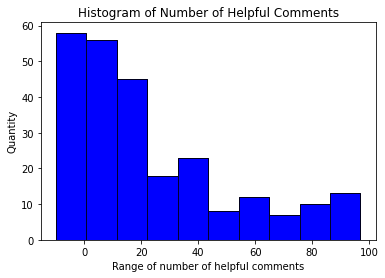

In [ ]:
# matplotlib histogram
plt.hist(mydata['reviews.numHelpful'], color = 'blue', edgecolor = 'black',
         bins = int(107/10))

# seaborn histogram
sns.distplot(mydata['reviews.numHelpful'], hist=True, kde=False, 
             bins=int(107/10), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Number of Helpful Comments')
plt.xlabel('Range of number of helpful comments')
plt.ylabel('Quantity')